In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
data = []
labels = []
files = glob.glob("source/like/*.jpg")
for file in files:
    image = cv2.imread(file)
    img = cv2.resize(image, (400,600), interpolation = cv2.INTER_AREA)
    if image.shape[0] > image.shape[1]:
        data.append(img)
        labels.append(1)

files = glob.glob("source/dislike/*.jpg")
for file in files:
    image = cv2.imread(file)
    img = cv2.resize(image, (400,600), interpolation = cv2.INTER_AREA)
    if image.shape[0] > image.shape[1]:
        data.append(img)
        labels.append(0)

In [20]:
data = np.array(data)
labels = np.array(labels)
print(data.shape,labels.shape)

(882, 600, 400, 3) (882,)


In [21]:
target_dict = {
 0: 'dislike',
 1: 'like',
}

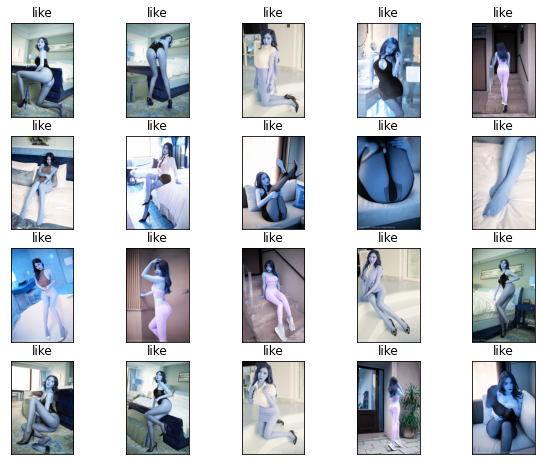

In [22]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(data[i] )
    plt.title( target_dict[(labels[i]) ])
    plt.xticks([])
    plt.yticks([])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=123)

In [25]:
print(X_train.shape,y_train.shape)

(705, 600, 400, 3) (705,)


In [26]:
X_train = X_train/np.float32(255)
y_train = y_train.astype(np.int32)
X_test = X_test/np.float32(255)
y_test = y_test.astype(np.int32)

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(600, 400, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 598, 398, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 299, 199, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 297, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 98, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 96, 64)       36928     
_________________________________________________________________
flatten (Flatten)            (None, 897024)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                5

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
23/23 [==============================] - 325s 14s/step - loss: 3.9245 - accuracy: 0.6000 - val_loss: 0.7215 - val_accuracy: 0.5311
Epoch 2/10
23/23 [==============================] - 404s 18s/step - loss: 0.6009 - accuracy: 0.6865 - val_loss: 0.5690 - val_accuracy: 0.6949
Epoch 3/10
23/23 [==============================] - 464s 20s/step - loss: 0.4966 - accuracy: 0.8000 - val_loss: 0.6134 - val_accuracy: 0.6667
Epoch 4/10
23/23 [==============================] - 263s 11s/step - loss: 0.2520 - accuracy: 0.9078 - val_loss: 0.5942 - val_accuracy: 0.6893
Epoch 5/10
23/23 [==============================] - 249s 11s/step - loss: 0.0888 - accuracy: 0.9787 - val_loss: 0.8399 - val_accuracy: 0.7006
Epoch 6/10
23/23 [==============================] - 248s 11s/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 0.9480 - val_accuracy: 0.6384
Epoch 7/10
23/23 [==============================] - 223s 10s/step - loss: 0.0317 - accuracy: 0.9943 - val_loss: 2.0944 - val_accuracy: 0.6328
Epoch 

6/6 - 11s - loss: 1.2447 - accuracy: 0.6893


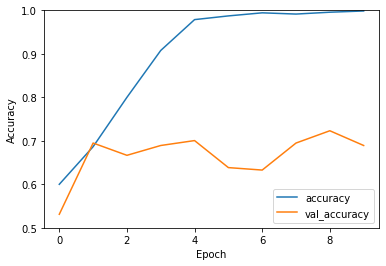

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [52]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [63]:
predict_data = []

files = sorted(glob.glob("source/predict/*.jpg"))
for file in files:
    print(file)
    image = cv2.imread(file)
    img = cv2.resize(image, (400,600), interpolation = cv2.INTER_AREA)
    predict_data.append(img)
predict_data = np.array(predict_data)
predict_data = predict_data/np.float32(255)
predict_data.shape

source/predict/test.jpg
source/predict/test1.jpg
source/predict/test2.jpg
source/predict/test3.jpg
source/predict/test4.jpg
source/predict/test5.jpg
source/predict/test6.jpg
source/predict/test7.jpg
source/predict/test8.jpg
source/predict/test9.jpg


(10, 600, 400, 3)

In [81]:
prediction = probability_model.predict(predict_data)
print(prediction.shape)
print(prediction)
result = []
for pre in prediction:
    zero = pre[0] / (float(pre[0]+pre[1]))
    one = pre[1] / (float(pre[0]+pre[1]))
    result.append([zero,one])
result = [ ["{:.2%}".format(val[0])+" {:.2%}".format(val[1])] for val in result]
print(result)

(10, 2)
[[9.4289076e-01 5.7109233e-02]
 [1.0000000e+00 3.0631671e-08]
 [9.9740064e-01 2.5994244e-03]
 [9.9335456e-01 6.6454615e-03]
 [7.9406059e-01 2.0593940e-01]
 [1.6666565e-04 9.9983335e-01]
 [4.2139913e-04 9.9957865e-01]
 [8.7564331e-01 1.2435669e-01]
 [6.8002343e-01 3.1997657e-01]
 [4.1179949e-01 5.8820051e-01]]
[['94.29% 5.71%'], ['100.00% 0.00%'], ['99.74% 0.26%'], ['99.34% 0.66%'], ['79.41% 20.59%'], ['0.02% 99.98%'], ['0.04% 99.96%'], ['87.56% 12.44%'], ['68.00% 32.00%'], ['41.18% 58.82%']]
